In [4]:
import lib.db_connector
import pandas as pd
import seaborn as sns

#Set to true if database connection is not available
local = True

if not local:
    db = lib.db_connector.DbConnector(db_name = 'speakql_study', verbose = False)

### Data Extraction from jp8 DB

In [5]:
if not local:
    f = open('./queries/get_all_final_attempts.sql')
    query = f.read()
    f.close()
    df = db.do_single_select_query_into_dataframe(query)
    df.to_excel('./data/df/study-results-eda-df.xlsx')
else:
    df = pd.read_excel('./data/df/study-results-eda-df.xlsx')
# df = df.where(df.tot_pt < 240).dropna(how = 'all')
df

,Unnamed: 0,idparticipant,idsession,idattemptsubmission,idquery,idstep,attemptnum,total_time,recording_time,planning_time,...,usedspeakql,complexity,normalized,is_complex,num_mods,num_joins,num_funcs,num_proj,num_tables,num_selections
0,0,2,41,278,1,1,1,74,16,58,...,0,1.05,-1.279513,0,0,0,0,1,1,0
1,1,10,51,670,1,1,1,113,10,103,...,0,1.05,-1.279513,0,0,0,0,1,1,0
2,2,12,53,719,1,1,1,69,9,60,...,0,1.05,-1.279513,0,0,0,0,1,1,0
3,3,16,57,936,1,1,1,44,13,31,...,0,1.05,-1.279513,0,0,0,0,1,1,0
4,4,1,39,240,1,1,1,98,11,88,...,1,1.05,-1.279513,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,16,57,986,17,30,2,85,81,4,...,1,12.25,2.364755,1,0,4,0,1,5,4
567,567,5,46,474,17,30,2,46,38,8,...,0,12.25,2.364755,1,0,4,0,1,5,4
568,568,13,54,841,17,30,2,49,45,3,...,0,12.25,2.364755,1,0,4,0,1,5,4
569,569,15,56,932,17,30,2,76,64,11,...,0,12.25,2.364755,1,0,4,0,1,5,4


### Data Transformation

In [57]:
df = df.where(df.tot_pt < 480).dropna(how = 'all')
print(df.idsession.dtype)
for column in df.columns:
    if column not in ['complexity', 'normalized'] and df[column].dtype == 'float64':
        df[column] = df[column].astype('int64')
df

float64


,idparticipant,idsession,idattemptsubmission,idquery,idstep,attemptnum,total_time,recording_time,planning_time,tot_pt,...,usedspeakql,complexity,normalized,is_complex,num_mods,num_joins,num_funcs,num_proj,num_tables,num_selections
0,2,41,278,1,1,1,74,16,58,58,...,0,1.05,-1.279513,0,0,0,0,1,1,0
1,10,51,670,1,1,1,113,10,103,103,...,0,1.05,-1.279513,0,0,0,0,1,1,0
2,12,53,719,1,1,1,69,9,60,60,...,0,1.05,-1.279513,0,0,0,0,1,1,0
3,1,39,240,1,1,1,98,11,88,88,...,1,1.05,-1.279513,0,0,0,0,1,1,0
4,3,44,345,1,1,1,6,14,-8,72,...,1,1.05,-1.279513,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,4,45,433,17,30,2,101,90,11,40,...,1,12.25,2.364755,1,0,4,0,1,5,4
425,6,47,668,17,30,2,118,109,9,128,...,1,12.25,2.364755,1,0,4,0,1,5,4
426,5,46,474,17,30,2,46,38,8,104,...,0,12.25,2.364755,1,0,4,0,1,5,4
427,13,54,841,17,30,2,49,45,3,190,...,0,12.25,2.364755,1,0,4,0,1,5,4


### Pair Grid plotting of dependent vars x query attributes

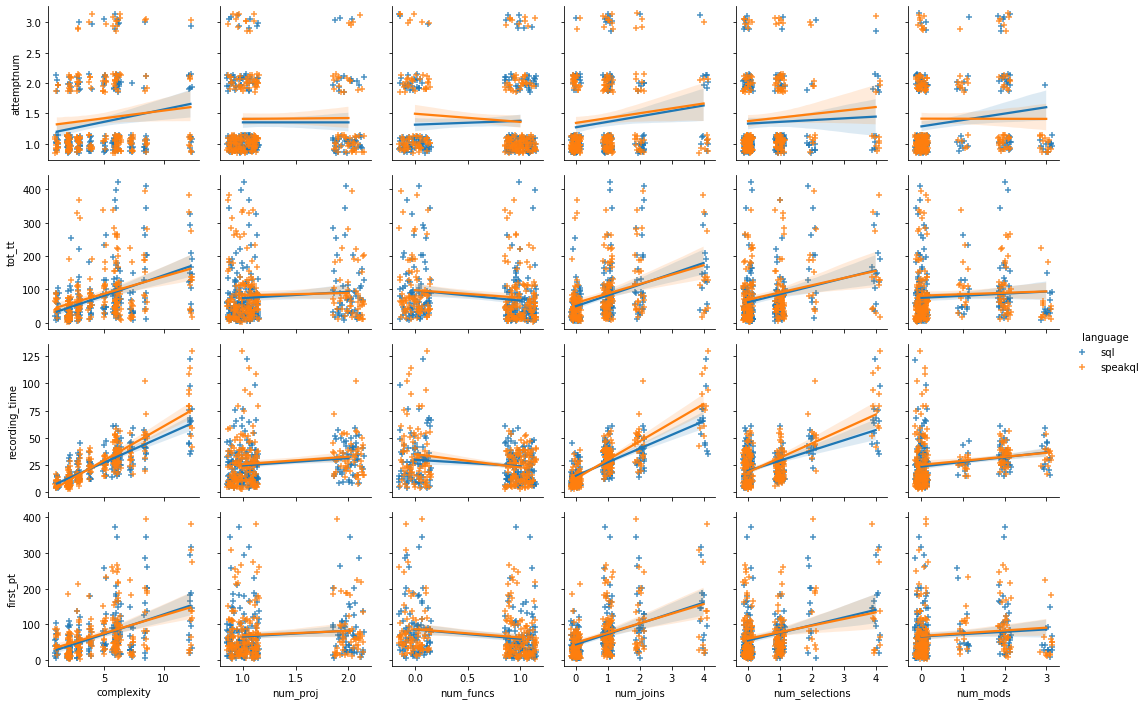

In [102]:
g = sns.PairGrid(
    df,
    x_vars = ['complexity', 'num_proj', 'num_funcs', 'num_joins', 'num_selections', 'num_mods'],
    y_vars = ['attemptnum', 'tot_tt', 'recording_time', 'first_pt'],
    hue = 'language'
)
g.map_offdiag(sns.regplot, x_jitter = .15, y_jitter = .15, marker = '+')
g.add_legend()

## Plots of average number of attempts by query

**Both Dialects:**

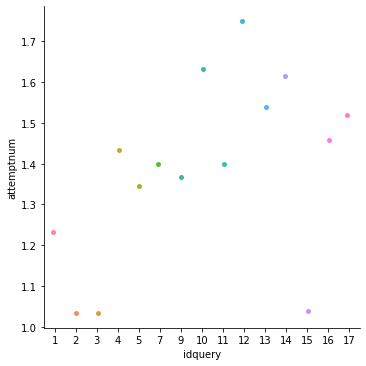

In [58]:
avg_attempts = df[['idquery', 'attemptnum']].groupby('idquery').mean().reset_index()
sns.catplot(x = 'idquery', y = 'attemptnum', data = avg_attempts)

**SQL:**

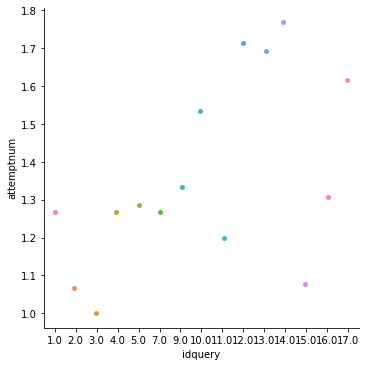

In [60]:
sql_avg_attempts = df.where(
    df.language == 'sql'
).dropna(how = 'all')[['idquery', 'attemptnum']].groupby('idquery').mean().reset_index()
sns.catplot(x = 'idquery', y = 'attemptnum', data = sql_avg_attempts)

**SpeakQL:**

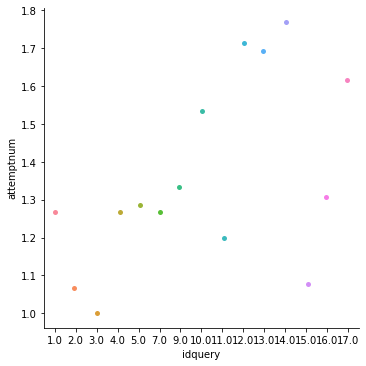

In [61]:
speakql_avg_attempts = df.where(
    df.language == 'speakql'
).dropna(how = 'all')[['idquery', 'attemptnum']].groupby('idquery').mean().reset_index()
sns.catplot(x = 'idquery', y = 'attemptnum', data = sql_avg_attempts)

### Box and Whisker of total planning time by language

<AxesSubplot:xlabel='idquery', ylabel='tot_pt'>

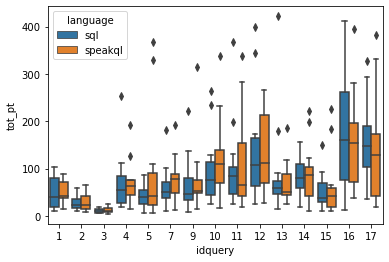

In [63]:
sns.boxplot(x = 'idquery', y = 'tot_pt', data = df, hue = 'language')

### Box and Whisker of total time (planning + recording for all attempts) by language and query

<AxesSubplot:xlabel='idquery', ylabel='tot_tt'>

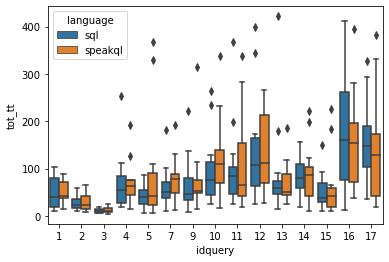

In [64]:
sns.boxplot(x = 'idquery', y = 'tot_tt', data = df, hue = 'language')

### Box and Whisker of time by language and number of joins

<AxesSubplot:xlabel='num_joins', ylabel='tot_tt'>

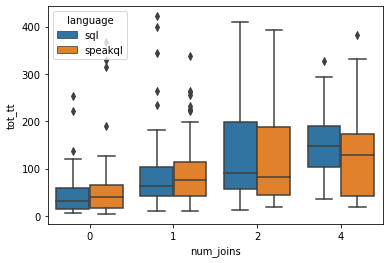

In [69]:
sns.boxplot(x = 'num_joins', y = 'tot_tt', data = df, hue = 'language')

**First attempt planning time:**

<AxesSubplot:xlabel='num_joins', ylabel='first_pt'>

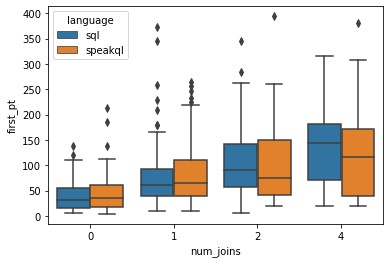

In [71]:
sns.boxplot(x = 'num_joins', y = 'first_pt', data = df, hue = 'language')

**Recording time:**

<AxesSubplot:xlabel='num_joins', ylabel='recording_time'>

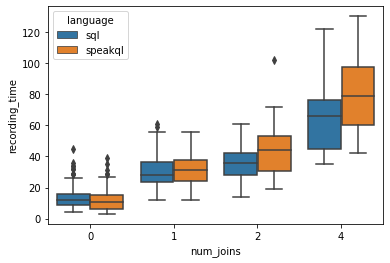

In [72]:
sns.boxplot(x = 'num_joins', y = 'recording_time', data = df, hue = 'language')

### Plot of attempt nums by number of joins

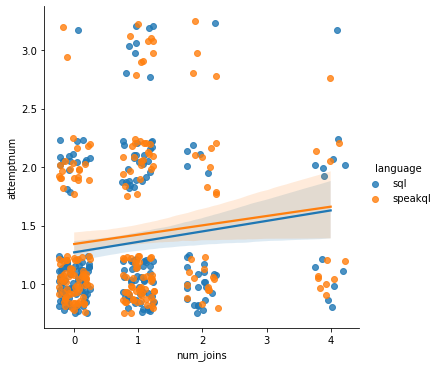

In [73]:
sns.lmplot(data = df, x = 'num_joins', y = 'attemptnum', x_jitter = .25, y_jitter = .25, hue = 'language')

### Plots of attempt nums (y) by overall complexity (x)

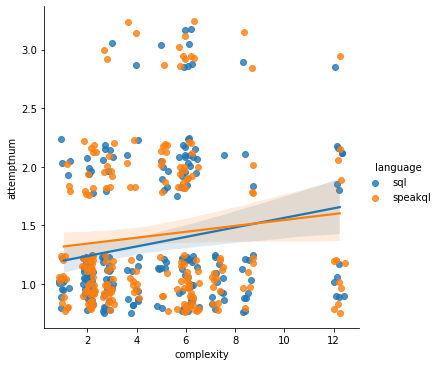

In [65]:
sns.lmplot(data = df, x = 'complexity', y = 'attemptnum', x_jitter = .25, y_jitter = .25, hue = 'language')